In [3]:
#Python
#import module for predict
import os
import numpy as np
import configparser
import cv2
from matplotlib import pyplot as plt
#Keras
from keras.models import model_from_json
from keras.models import Model
#scikit learn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
import sys
sys.path.insert(0, './lib/')
# help_functions.py
from help_functions import *
# extract_patches.py
from extract_patches import *
# pre_processing.py
from pre_processing import *
import tensorflow as tf

from keras.models import Model

In [9]:

from keras import backend as K
K.tensorflow_backend._get_available_gpus()

import keras
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

print(sess)


In [2]:
def show_on_jupyter(img,color= None,title=None):
    import matplotlib.pyplot as plt
    import cv2
    """Show img on jupyter notebook. No return Value
    
    You should check the img's color space.
    I just consider about RGB color space & 1 ch color space(like green ch, gray space, ...)
    
    using matplotlib
    
    Parameters
    ----------
    img : 2-D Array
        numpy 2-D array
        opencv / sklearn / plt are avaliable.
        float / uint8 data type.
        
    color : string
        'gray' or 'None'
        'gray' means that img has a 1 ch.
        'None' means that img has a RGB ch.
        (default: None)
        
    title : string
        decide img's title
        (default : None)
        
    Returns
    -------
        No return value.
    
    Example
    -------
    >>> img = cv2.imread(img_path)
    >>> show_on_jupyter(img)
    
    img has a 1 ch
    >>> img = cv2.imread(img_path)
    >>> show_on_jupyter(img,'gray')
    """
    if color == 'gray':
        plt.axis("off")
        plt.title(title)
        plt.axis('off')
        plt.figure(figsize=(10, 10))
        plt.imshow(img,cmap=color)
        plt.show()
    elif color == None:
        plt.axis("off")
        plt.title(title)
        plt.axis('off')
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
    else:
        print("Gray or None")
        


def draw_grid(img, line_color=(0, 255, 0), thickness=1, type_=cv2.LINE_AA, pxstep=50):
    '''(ndarray, 3-tuple, int, int) -> void
    draw gridlines on img
    line_color:
        BGR representation of colour
    thickness:
        line thickness
    type:
        8, 4 or cv2.LINE_AA
    pxstep:
        grid line frequency in pixels
    '''
    x = pxstep
    y = pxstep
    while x < img.shape[1]:
        cv2.line(img, (x, 0), (x, img.shape[0]), color=line_color, lineType=type_, thickness=thickness)
        x += pxstep

    while y < img.shape[0]:
        cv2.line(img, (0, y), (img.shape[1], y), color=line_color, lineType=type_, thickness=thickness)
        y += pxstep

380 700


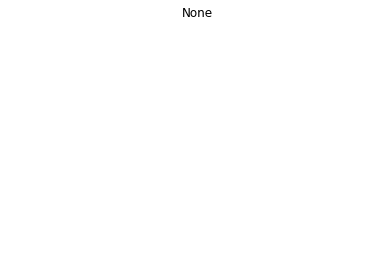

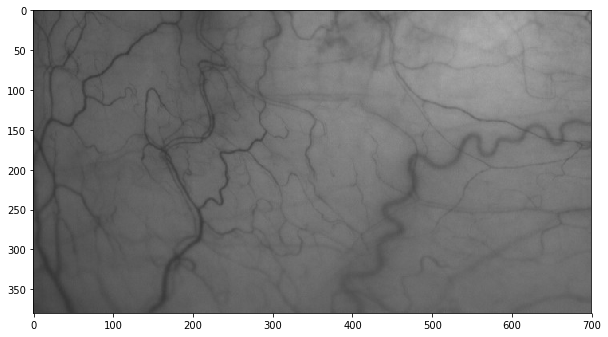

In [3]:
conj_path_local =  './conj_data/YSData01.png'

img = cv2.imread(conj_path_local)
h, w,c = img.shape

print(h,w)


show_on_jupyter(img)

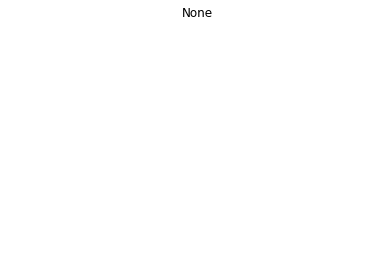

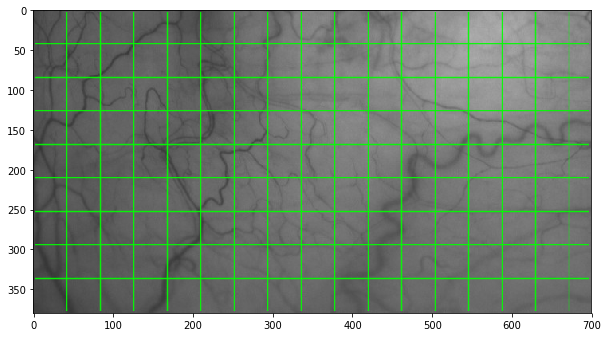

In [4]:
temp_img= img.copy()
draw_grid(temp_img,pxstep=42)
show_on_jupyter(temp_img)